In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
data_root = "./data"
data_path = os.path.join(data_root, "data_2001-10-29_2020-06-08.csv")
samsung = pd.read_csv(data_path)

In [45]:
samsung.drop(['diff', 'high', 'low'], axis='columns', inplace=True)

In [46]:
samsung.head()

,date,close,open,volume
0,2001-10-29,184000,183000,509692
1,2001-10-30,174000,177000,676544
2,2001-10-31,173500,170500,579648
3,2001-11-01,179000,177000,685945
4,2001-11-02,183000,181500,758497


In [55]:
delete_idx = samsung[samsung['date'] > '2018-04-27'].index

In [56]:
samsung = samsung.drop(delete_idx)

In [57]:
to_data_path = os.path.join(data_root, "samsung.csv")

samsung.to_csv(to_data_path, index=False)

In [37]:
y_samsung_close = samsung['close']
y_samsung_close.head()
y_samsung_close.tail()

4595    51400
4596    54500
4597    54600
4598    55500
4599    54900
Name: close, dtype: int64

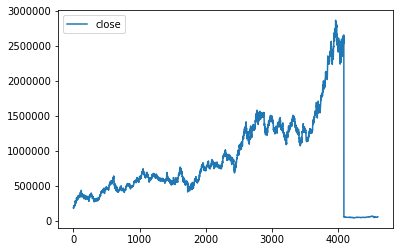

In [38]:
plt.plot(y_samsung_close, label="close")
plt.legend()
plt.show()

# 셀트리온 헬스케어

In [78]:
data_root = "./data"
celtrion_data_path = os.path.join(data_root, "data_2017-07-28_2020-06-08.csv")
celtrion = pd.read_csv(celtrion_data_path)

In [79]:
celtrion = celtrion.drop_duplicates(['date'], keep='last')

In [80]:
celtrion = celtrion.sort_values(by=['date'], ascending=True)

In [81]:
celtrion.index = [ i for i in range(len(celtrion.index))]

In [82]:
celtrion.head()

,date,close,open,volume
0,2017-07-28,50300,43650,14075726
1,2017-07-31,49750,49800,4965563
2,2017-08-01,51300,50900,3611026
3,2017-08-02,51000,50800,2495045
4,2017-08-03,51600,50500,3930618


In [58]:
to_data_path = os.path.join(data_root, "celtrion.csv")

celtrion.to_csv(to_data_path, index=False)

In [16]:
y_celtrion_close = celtrion['close']

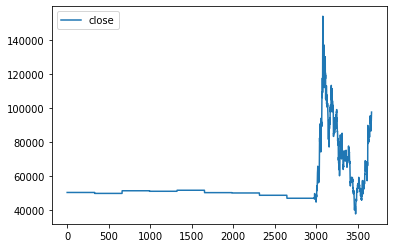

In [17]:
plt.plot(y_celtrion_close, label="close")
plt.legend()
plt.show()

In [65]:
def create_window(input, seq_length):
    data_raw = input.values
    data = []

    # create all possible sequences of window size
    for index in range(len(data_raw) - seq_length):
        data.append(data_raw[index: index + seq_length])

    data = np.array(data)

    return data

In [67]:
data = create_window(y_celtrion_close, 50+1)

In [68]:
print(data)

[[50300 50300 50300 ... 50300 50300 50300]
 [50300 50300 50300 ... 50300 50300 50300]
 [50300 50300 50300 ... 50300 50300 50300]
 ...
 [57200 62400 66500 ... 94100 92300 92300]
 [62400 66500 68100 ... 92300 92300 95000]
 [66500 68100 67100 ... 92300 95000 95200]]


In [87]:
window_size = 3

for s in range(1, window_size+1):
    celtrion['close_{}'.format(s)] = celtrion['close'].shift(s)

In [88]:
celtrion.head()

,date,close,close_1,close_2,close_3
0,2017-07-28,50300,NaN,NaN,NaN
1,2017-07-31,49750,50300.0,NaN,NaN
2,2017-08-01,51300,49750.0,50300.0,NaN
3,2017-08-02,51000,51300.0,49750.0,50300.0
4,2017-08-03,51600,51000.0,51300.0,49750.0


In [85]:
celtrion.drop(['open', 'volume'], axis='columns', inplace=True)